### Könyvtárak importálása

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Adatok létrehozása

In [3]:
X1 = np.array([1, 2, 3, 4, 5, 6, 7])
Y = np.array([3, 5, 5, 6, 6, 8, 9])

### Adatok ábrázolása

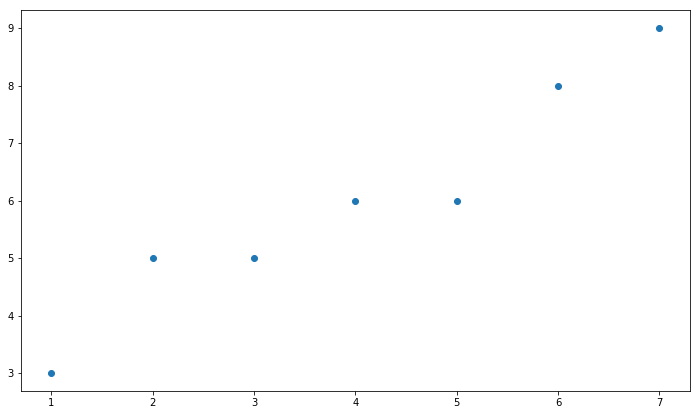

In [4]:
plt.figure(figsize=(12, 7))
plt.scatter(X1, Y)

###  
###  
###  
### b0 és b1 együtthatók kezdeti értékeinek felvétele

In [5]:
b0 = 0
b1 = 0

### Lineáris regresszió függvénye (Y_)

In [6]:
Y_ = b0 + b1*X1
Y_

array([0, 0, 0, 0, 0, 0, 0])

### Regressziós függvény ábrázolása

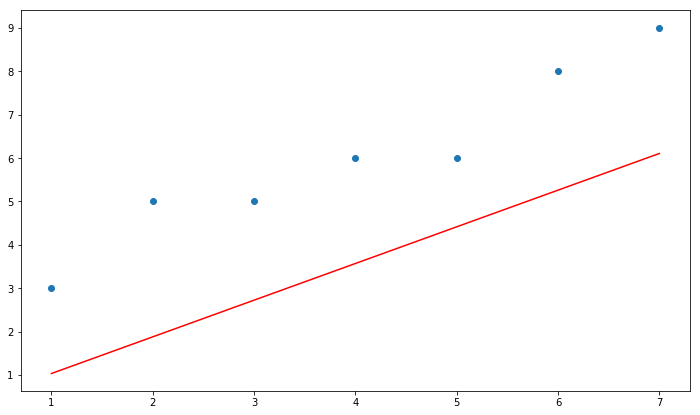

In [18]:
plt.figure(figsize=(12, 7))
plt.scatter(X1, Y)
plt.plot(X1, Y_, color='red')

### Eltérések (hibák) négyzetösszege

In [8]:
np.sum((Y_ - Y)**2)

276

### Tanulási sebesség értékének beállítása

In [9]:
alpha = 0.001

### b0 és b1 együtthatók értékeinek közelítése az optimálishoz

In [22]:
b0 = b0 - np.sum(2*(b0 + b1*X1 - Y))*alpha
b1 = b1 - np.sum(2*(b0 + b1*X1 - Y)*X1)*alpha

print('b0: ', b0, ' b1: ', b1)

b0:  0.25077606751988146  b1:  1.0788707918908673


### Regressziós függvény újraszámolása az új együtthatókkal

In [23]:
Y_ = b0 + b1*X1

### Új regressziós függvény ábrázolása

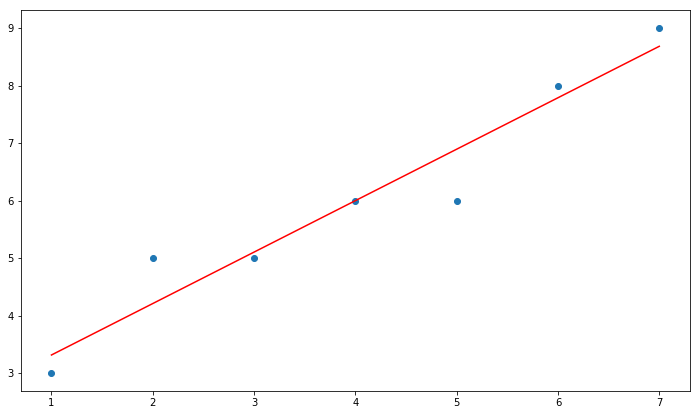

In [30]:
plt.figure(figsize=(12, 7))
plt.scatter(X1, Y)
plt.plot(X1, Y_, color='red')

#plt.plot(X1, Y_, color='red', label=('{0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), 'X'))
#plt.legend()

### b0 és b1 együtthatók értékeinek ciklikus újraszámolása

In [26]:
hibakovetes = []

In [29]:
alpha = 0.001

for i in range(1000):
    b0 = b0 - np.sum(2*(b0 + b1*X1 - Y))*alpha
    b1 = b1 - np.sum(2*(b0 + b1*X1 - Y)*X1)*alpha
    hibakovetes.append(np.sum((b0 + b1*X1 - Y)**2))
    
Y_ = b0 + b1*X1
print('b0: ', b0, ' b1: ', b1)
print('hiba négyzetösszeg: ', np.sum((Y_ - Y)**2))

b0:  2.4194450857212995  b1:  0.8946953072744851
hiba négyzetösszeg:  1.6786880580411772


### Hibacsökkenés követése

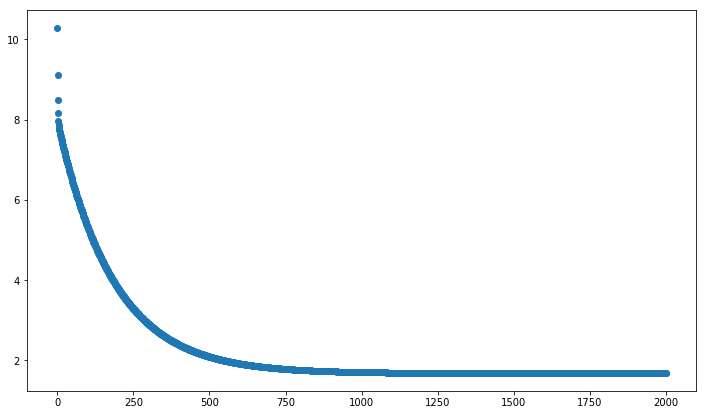

In [31]:
plt.figure(figsize=(12, 7))
plt.scatter(np.linspace(0, len(hibakovetes), len(hibakovetes)), hibakovetes)

###  
###  
###  
### Ellenőrzés seaborn és scipy segítségével

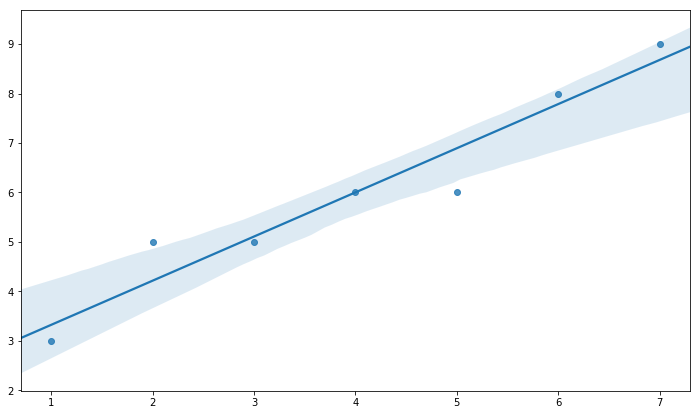

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.regplot(X1, Y)

In [16]:
from scipy import stats
stats.linregress(X1, Y)

LinregressResult(slope=0.8928571428571428, intercept=2.428571428571429, rvalue=0.9643959372630744, pvalue=0.00045068017721294133, stderr=0.10949792654825644)